In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats

In [2]:
import pandas as pd
#load the CSV file
df = pd.read_csv(r'C:\Users\Z40\Documents\Rakamin Academy - Data Science\Week 13\HW Unsupervised Learning\flight.csv')
print ('Number of samples: ',len(df))

Number of samples:  62988


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

### Handling Missing Values

In [4]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [5]:
# Handling Missing Values
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())
df['SUM_YR_1'] = df['SUM_YR_1'].fillna(df['SUM_YR_1'].mean())
df['SUM_YR_2'] = df['SUM_YR_2'].fillna(df['SUM_YR_2'].mean())

df = df.dropna(subset =['GENDER'])

df = df.drop(['WORK_CITY','WORK_PROVINCE','WORK_COUNTRY'], axis = 1)

# Cek kembali missing values
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

### Duplicated Data

In [6]:
print(df.duplicated().value_counts())
print(df.duplicated().sum())

False    62985
dtype: int64
0


Tidak terdapat data duplikat pada dataset.

## Descriptive Analysis

In [7]:
num_dtypes = ['int16', 'int32', 'int64', 'float', 'float16', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include = num_dtypes)
numerical = num_df.columns

cat_dtypes = ['object']
cat_df = df.select_dtypes(include = cat_dtypes)
categorical = cat_df.columns

print(numerical)
print(categorical)

Index(['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1',
       'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')
Index(['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'LOAD_TIME',
       'LAST_FLIGHT_DATE'],
      dtype='object')


In [8]:
df[numerical].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62985.000000,62985.000000,62985.000000,62985.000000,62985.000000,62985.000000,62985.000000,62985.000000,62985.000000,62985.000000,62985.000000,62985.000000,62985.000000,62985.000000,62985.000000
mean,31494.113106,4.102135,42.475733,11.839501,10923.206509,5354.969636,5602.782307,17122.760102,176.121902,67.751101,166.035786,0.319759,0.721547,12543.607938,2.728237
std,18182.752867,0.373788,9.852551,14.049756,16332.283621,8073.466929,8687.577311,20958.333748,183.821977,77.519373,123.398937,1.136010,0.185412,20499.958442,7.364323
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15748.000000,4.000000,35.000000,3.000000,2518.000000,1020.000000,785.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.612000,2775.000000,0.000000
50%,31494.000000,4.000000,41.000000,7.000000,5700.000000,2842.000000,2784.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.000000,0.000000
75%,47240.000000,4.000000,48.000000,15.000000,12831.000000,6523.000000,6826.000000,21271.000000,268.000000,82.000000,228.000000,0.000000,0.809469,14302.000000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000


In [9]:
df[categorical].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,LOAD_TIME,LAST_FLIGHT_DATE
count,62985,62985,62985,62985,62985
unique,3068,3406,2,1,731
top,1/13/2011,2/16/2013,Male,3/31/2014,3/31/2014
freq,184,96,48134,62985,958


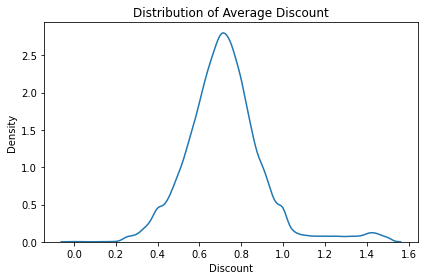

In [10]:
ax = sns.kdeplot(x = 'avg_discount', data=df)
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.tight_layout()

In [539]:
df = df[df['avg_discount']<=1]

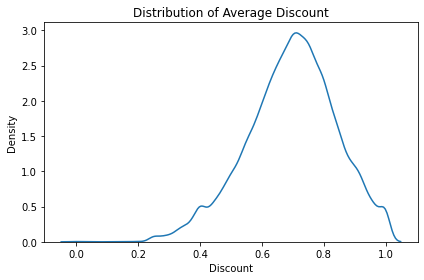

In [540]:
ax = sns.kdeplot(x = 'avg_discount', data=df)
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.tight_layout()

Average discount yang > 1 (100%), hal ini terlihat tidak valid dan didrop.

## Feature Selection

In [28]:
df_1 = df.copy()

### Feature Drop

In [29]:
df_1 = df_1.drop(['MEMBER_NO','AGE','GENDER', 'SUM_YR_1','SUM_YR_2','AVG_INTERVAL','MAX_INTERVAL'], axis = 1)

Menghapus feature yang memiliki korelasi lemah pada Heatmap di tahap sebelumnya, EDA.

<AxesSubplot:>

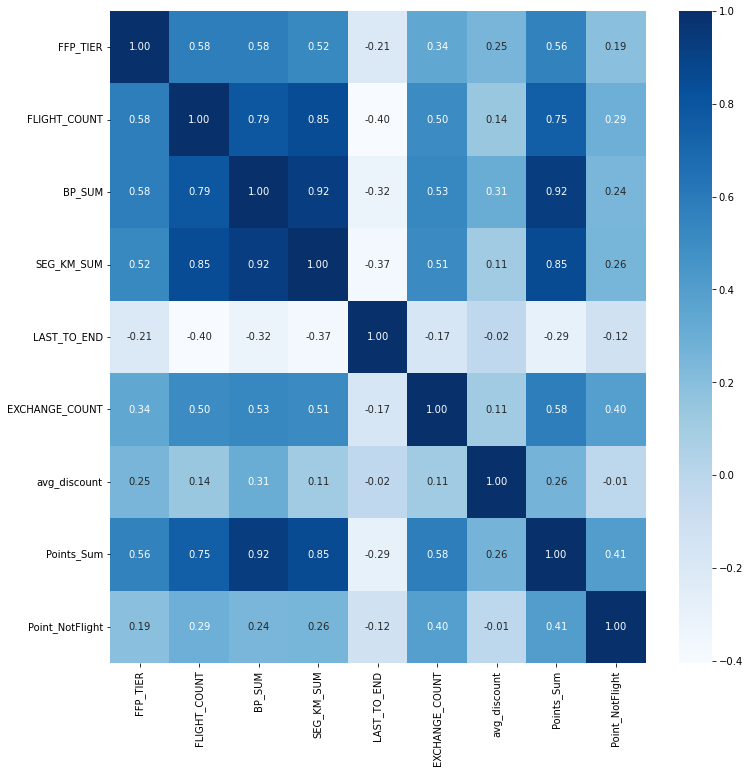

In [30]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_1.corr(), cmap='Blues', annot=True, fmt='.2f')

Fitur BP_SUM, SEG_KM_SUM, avg_discount merupakan fitur yang memiliki korelasi cukup tinggi terhadap fitur lain dan akan dipilih sebagai fitur untuk clustering nantinya.

## Feature Engineering

In [31]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62985 entries, 0 to 62987
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_DATE           62985 non-null  object 
 1   FIRST_FLIGHT_DATE  62985 non-null  object 
 2   FFP_TIER           62985 non-null  int64  
 3   LOAD_TIME          62985 non-null  object 
 4   FLIGHT_COUNT       62985 non-null  int64  
 5   BP_SUM             62985 non-null  int64  
 6   SEG_KM_SUM         62985 non-null  int64  
 7   LAST_FLIGHT_DATE   62985 non-null  object 
 8   LAST_TO_END        62985 non-null  int64  
 9   EXCHANGE_COUNT     62985 non-null  int64  
 10  avg_discount       62985 non-null  float64
 11  Points_Sum         62985 non-null  int64  
 12  Point_NotFlight    62985 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 6.7+ MB


In [32]:
# Replace Feb 29th as Feb 28th, February is 28 days.
df_1['LAST_FLIGHT_DATE'] = df_1['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00', '2014/2/28  0:00:00')

# Change object to date type
df_1['FFP_DATE'] = pd.to_datetime(df_1['FFP_DATE'])
df_1['FIRST_FLIGHT_DATE'] = pd.to_datetime(df_1['FFP_DATE'])
df_1['LOAD_TIME'] = pd.to_datetime(df_1['LOAD_TIME'])
df_1['LAST_FLIGHT_DATE'] = pd.to_datetime(df_1['LAST_FLIGHT_DATE'])

df_1['FFP_DATE'] = df_1['FFP_DATE'].values.astype('datetime64[ns]')
df_1['FIRST_FLIGHT_DATE'] = df_1['FIRST_FLIGHT_DATE'].values.astype('datetime64[ns]')
df_1['LOAD_TIME'] = df_1['LOAD_TIME'].values.astype('datetime64[ns]')
df_1['LAST_FLIGHT_DATE'] = df_1['LAST_FLIGHT_DATE'].values.astype('datetime64[ns]')

In [33]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62985 entries, 0 to 62987
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           62985 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  62985 non-null  datetime64[ns]
 2   FFP_TIER           62985 non-null  int64         
 3   LOAD_TIME          62985 non-null  datetime64[ns]
 4   FLIGHT_COUNT       62985 non-null  int64         
 5   BP_SUM             62985 non-null  int64         
 6   SEG_KM_SUM         62985 non-null  int64         
 7   LAST_FLIGHT_DATE   62985 non-null  datetime64[ns]
 8   LAST_TO_END        62985 non-null  int64         
 9   EXCHANGE_COUNT     62985 non-null  int64         
 10  avg_discount       62985 non-null  float64       
 11  Points_Sum         62985 non-null  int64         
 12  Point_NotFlight    62985 non-null  int64         
dtypes: datetime64[ns](4), float64(1), int64(8)
memory usage: 6.7 

In [34]:
# Create New Feature
df_1['FFP_duration'] = (df_1['LOAD_TIME'] - df_1['FFP_DATE'])/np.timedelta64(1,'Y')
df_1['Residual_Point'] = (df_1['Points_Sum'] - df_1['Point_NotFlight'])
df_1['Flight/Year']= df_1['FLIGHT_COUNT'] / ((df_1['LAST_FLIGHT_DATE'] - df_1['FIRST_FLIGHT_DATE'])/np.timedelta64(1,'Y'))

In [35]:
df_1.head(3)

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,FFP_duration,Residual_Point,Flight/Year
0,2006-11-02,2006-11-02,6,2014-03-31,210,505308,580717,2014-03-31,1,34,0.961639,619760,50,7.408776,619710,28.344762
1,2007-02-19,2007-02-19,6,2014-03-31,140,362480,293678,2014-03-25,7,29,1.252314,415768,33,7.110344,415735,19.735218
2,2007-02-01,2007-02-01,6,2014-03-31,135,351159,283712,2014-03-21,11,20,1.254676,406361,26,7.159627,406335,18.928114


In [36]:
#Drop Useless Feature
df_1 = df_1.drop(['FFP_TIER', 'FFP_DATE','FIRST_FLIGHT_DATE', 'EXCHANGE_COUNT', 'LAST_FLIGHT_DATE',
                  'LOAD_TIME','FLIGHT_COUNT', 'Points_Sum', 'Point_NotFlight'], axis = 1)

In [37]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62985 entries, 0 to 62987
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BP_SUM          62985 non-null  int64  
 1   SEG_KM_SUM      62985 non-null  int64  
 2   LAST_TO_END     62985 non-null  int64  
 3   avg_discount    62985 non-null  float64
 4   FFP_duration    62985 non-null  float64
 5   Residual_Point  62985 non-null  int64  
 6   Flight/Year     62985 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 3.8 MB


## Handling Outlier

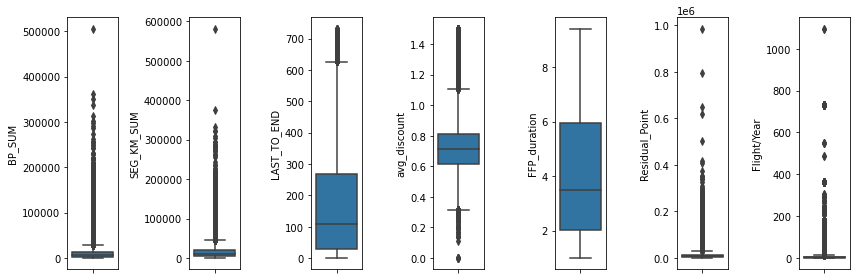

In [38]:
nums = ['BP_SUM', 'SEG_KM_SUM','LAST_TO_END', 'avg_discount', 'FFP_duration', 'Residual_Point', 'Flight/Year']
plt.figure(figsize = (12, 4))
for i in range(0, len(nums)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y = df_1[nums[i]], orient='v')
    plt.tight_layout()

In [39]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df_1)}')

filtered = np.array([True] * len(df_1))
for col in ['BP_SUM', 'SEG_KM_SUM','LAST_TO_END', 'avg_discount', 'FFP_duration', 'Residual_Point', 'Flight/Year']:
    Q1 = df_1[col].quantile(0.25)
    Q3 = df_1[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    filtered = ((df_1[col] >= low_limit) & (df_1[col] <= high_limit)) & filtered
df_1 = df_1[filtered].reset_index()

print(f'Jumlah baris setelah memfilter outlier: {len(df_1)}')

Jumlah baris sebelum memfilter outlier: 62985
Jumlah baris setelah memfilter outlier: 49448


## Feature Transformation

In [40]:
# Standardization

from sklearn.preprocessing import StandardScaler
feature = ['BP_SUM', 'SEG_KM_SUM','LAST_TO_END', 'avg_discount', 'FFP_duration', 'Residual_Point', 'Flight/Year']
X = df_1[feature].values
X_std = StandardScaler().fit_transform(X)
dfs = pd.DataFrame(data=X_std, columns=feature)

In [41]:
dfs.head()

,BP_SUM,SEG_KM_SUM,LAST_TO_END,avg_discount,FFP_duration,Residual_Point,Flight/Year
0,3.446097,3.526047,0.428049,0.660314,1.466525,3.037935,0.201674
1,3.620504,3.576585,-1.015814,0.410802,0.292949,3.199221,0.489031
2,2.643787,3.523625,0.510015,0.426154,1.074526,2.306412,-0.789689
3,3.617959,3.403175,-0.650120,0.533617,0.246974,3.275677,3.342669
4,2.737947,3.377379,-0.681645,0.536012,1.863362,2.392327,-0.434476


In [42]:
dfs.describe()

,BP_SUM,SEG_KM_SUM,LAST_TO_END,avg_discount,FFP_duration,Residual_Point,Flight/Year
count,4.944800e+04,4.944800e+04,4.944800e+04,4.944800e+04,4.944800e+04,4.944800e+04,4.944800e+04
mean,-2.282864e-16,-1.406154e-15,-1.728830e-17,-2.131159e-16,2.983444e-16,1.050769e-16,-1.595708e-15
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.172485e+00,-1.228691e+00,-1.034730e+00,-2.645286e+00,-1.373043e+00,-1.182012e+00,-1.060243e+00
25%,-7.592001e-01,-7.744752e-01,-8.140519e-01,-6.597469e-01,-8.685270e-01,-7.657710e-01,-7.512416e-01
50%,-3.247077e-01,-3.150475e-01,-3.285607e-01,2.115835e-02,-2.369742e-01,-3.223128e-01,-3.384774e-01
75%,4.821827e-01,5.059684e-01,5.163200e-01,6.710311e-01,8.131941e-01,4.850074e-01,4.443622e-01
max,3.627800e+00,3.580376e+00,2.905945e+00,2.836140e+00,2.343681e+00,3.715956e+00,3.596653e+00


Nilai standard deviasi sudah mendekati 1, proses standarisasi telah berhasil.

## Modeling

### 1. Kmeans Clustering

In [43]:
df_km = dfs.copy()

<AxesSubplot:>

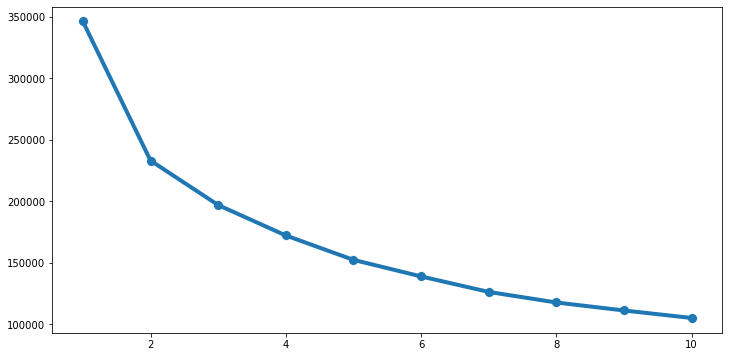

In [44]:
from sklearn.cluster import KMeans
inertia = []   #Inisiasi variabel kosong untuk nilai inertia

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_km)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))

sns.lineplot(x=range(1, 11), y=inertia, linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=100, )

In [45]:
# Inertia Value
inertia

[346135.9999999994,
 233114.30663064925,
 196958.19509474013,
 172260.6677154393,
 152425.6059420787,
 138971.1027692192,
 126382.98922172374,
 117791.4513832851,
 111308.44187957248,
 105214.46151356332]

In [46]:
pd.Series(inertia) - pd.Series(inertia).shift(-1)

0    113021.693369
1     36156.111536
2     24697.527379
3     19835.061773
4     13454.503173
5     12588.113547
6      8591.537838
7      6483.009504
8      6093.980366
9              NaN
dtype: float64

In [47]:
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    32.652395
1    15.510035
2    12.539477
3    11.514562
4     8.826931
5     9.058080
6     6.798018
7     5.503803
8     5.474859
9          NaN
dtype: float64

Berdasarkan nilai inertia dan Elbow Methods,cluster yang optimal adalah 3 cluster. Pengurangan nilai inertia yang signifikan terjadi hanya sampai 3 cluster.

In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_km.values)

KMeans(n_clusters=3, random_state=0)

In [56]:
df_2 = df_1.copy()
df_2['kmeans_cluster'] = kmeans.labels_
df_2.head()

,index,BP_SUM,SEG_KM_SUM,LAST_TO_END,avg_discount,FFP_duration,Residual_Point,Flight/Year,kmeans_cluster
0,4513,27223,45527,233,0.792055,7.425204,27211,3.974828,1
1,4819,28251,46007,4,0.756123,4.769434,28251,4.830694,1
2,4896,22494,45504,246,0.758333,6.538122,22494,1.022134,1
3,4949,28236,44360,62,0.773809,4.665394,28744,13.330018,1
4,4986,23049,44115,57,0.774154,8.323237,23048,2.080108,1


In [57]:
display(df_2.groupby('kmeans_cluster').agg(['mean']))

,index,BP_SUM,SEG_KM_SUM,LAST_TO_END,avg_discount,FFP_duration,Residual_Point,Flight/Year
,mean,mean,mean,mean,mean,mean,mean,mean
kmeans_cluster,,,,,,,,
0,39906.287663,4265.889170,8290.512800,180.916351,0.663792,2.127185,4815.417878,4.510857
1,13502.046130,15747.277643,25759.754147,71.739979,0.735195,4.570719,17024.859796,5.227644
2,41246.621929,4153.758736,7394.072745,206.448803,0.706869,5.811359,4679.622670,1.095722


In [52]:
df_km['kmeans_cluster'] = kmeans.labels_

## PCA for Visualization
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2)
pca.fit(df_km)
pcs = pca.transform(df_km)

In [53]:
df_pca_1 = pd.DataFrame(data = pcs, columns = ['PC1', 'PC2'])
df_pca_1['kmeans_cluster'] = df_km['kmeans_cluster']
df_pca_1.head()

,PC1,PC2,kmeans_cluster
0,5.291871,-1.830765,1
1,5.917165,-0.968439,1
2,4.131436,-1.870853,1
3,6.624014,0.478627,1
4,4.600645,-2.281855,1


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

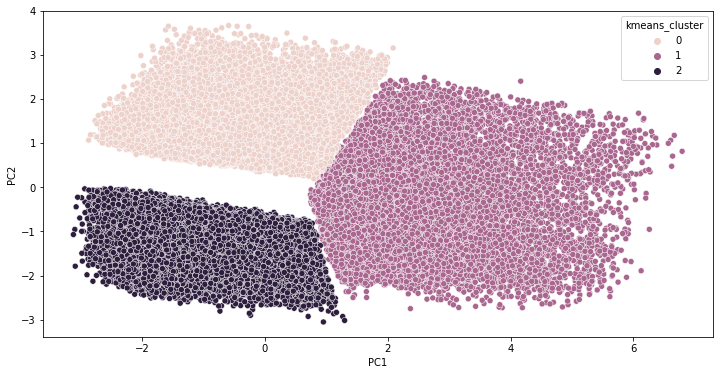

In [54]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x = 'PC1', y='PC2', hue = 'kmeans_cluster', data=df_pca_1, ax = ax)

Pada grafik terlihat batasan segmentasi yang jelas antara cluster 0, 1 dan 2.